In [1]:
from desy import *
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Runge Kutta order-4 solver

def RK4(f,y0,t0,tf,h=0.1):
    
    t = np.arange(t0,tf,h)
    
    #y = np.zeros(len(t))
    y = []
    
    y.append(y0)
    
    for n in range(0,len(t)-1):
        
        k1 = f(y[n],t[n])
       # print(k1)
        
        k2 = f(y[n]+h*k1/2.0,t[n]+h/2.0)
        k3 = f(y[n]+h*k2/2.0,t[n]+h/2.0)
        k4 = f(y[n]+h*k3,t[n]+h)
    
        
        #y[n+1] = y[n] + (1.0/6.0)*h*(k1+2*k2+2*k3+k4)
        y.append(y[n] + (1.0/6.0)*h*(k1+2*k2+2*k3+k4))

      
        
    return t,y

In [3]:
def expect(rho,operator):
    return np.trace(rho*operator)

# Dicke Case

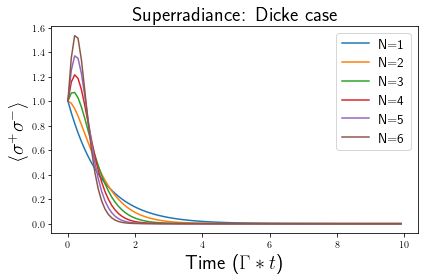

In [8]:
N=7
for i in range(1,N):
    #y0 = to_super(init_state(N))
    y0=init_state(i).full()

    f = lambda y,t: liouville_rk4_dicke(i,y)

    t0=0;tf=10
    
    t=tf-t0
    tlist=np.arange(t0,tf,0.1)

    t,y = RK4(f,y0,t0,tf)
    sp_list,sm_list,spsm_list=initialize(i)
    spsm_exp=sum(sp_list)*sum(sm_list)
    spsm_exp=spsm_exp.full()
    exp=[]
    for n in range(len(y)):
        exp.append(expect(Qobj(y[n]),Qobj(spsm_exp)))
    #y_true = 1*np.exp(t)
    
    plt.xlabel(r'Time ($\Gamma*t$)',fontsize=20)
    plt.ylabel(r'$\langle\sigma^{+}\sigma^{-}\rangle$',fontsize=20)
    
    plt.title(r'Superradiance: Dicke case',fontsize=20)
    plt.tight_layout()
    #plt.plot(tlist,sexp/i)
    plt.plot(tlist,np.array(exp)/i)
    plt.legend(['N=1','N=2','N=3','N=4','N=5','N=6','N=7'], prop={'size': 13.5})


# Extended Sample

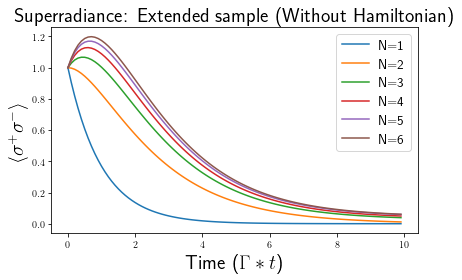

In [9]:
N=7
for i in range(1,N):
    #y0 = to_super(init_state(N))
    y0=init_state(i).full()

    f = lambda y,t: liouville_rk4(i,y)

    t0=0;tf=10
    t=tf-t0
    tlist=np.arange(t0,tf,0.1)

    t,y = RK4(f,y0,t0,tf)
    sp_list,sm_list,spsm_list=initialize(i)
    spsm_exp=sum(sp_list)*sum(sm_list)
    spsm_exp=spsm_exp.full()
    exp=[]
    for n in range(len(y)):
        exp.append(expect(Qobj(y[n]),Qobj(spsm_exp)))
    #y_true = 1*np.exp(t)
    
    plt.xlabel(r'Time ($\Gamma*t$)',fontsize=20)
    plt.ylabel(r'$\langle\sigma^{+}\sigma^{-}\rangle$',fontsize=20)
    
    plt.title(r'Superradiance: Extended sample (Without Hamiltonian)',fontsize=20)
    plt.tight_layout()
    #plt.plot(tlist,sexp/i)
    plt.plot(tlist,np.array(exp)/i)
    plt.legend(['N=1','N=2','N=3','N=4','N=5','N=6','N=7'], prop={'size': 13.5})


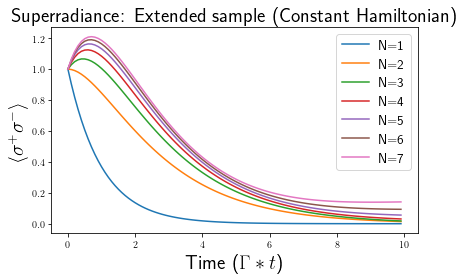

In [7]:
#Constant Dipolar interaction in Hamiltonian
N=8
for i in range(1,N):
    #y0 = to_super(init_state(N))
    y0=init_state(i).full()

    f = lambda y,t: liouville_rk4_ham_c(i,y)

    t0=0;tf=10
    t=tf-t0
    tlist=np.arange(t0,tf,0.1)

    t,y = RK4(f,y0,t0,tf)
    sp_list,sm_list,spsm_list=initialize(i)
    spsm_exp=sum(sp_list)*sum(sm_list)
    spsm_exp=spsm_exp.full()
    exp=[]
    for n in range(len(y)):
        exp.append(expect(Qobj(y[n]),Qobj(spsm_exp)))
    #y_true = 1*np.exp(t)
    
    plt.xlabel(r'Time ($\Gamma*t$)',fontsize=20)
    plt.ylabel(r'$\langle\sigma^{+}\sigma^{-}\rangle$',fontsize=20)
    
    plt.title(r'Superradiance: Extended sample (Constant Hamiltonian)',fontsize=20)
    plt.tight_layout()
    #plt.plot(tlist,sexp/i)
    plt.plot(tlist,np.array(exp)/i)
    plt.legend(['N=1','N=2','N=3','N=4','N=5','N=6','N=7'], prop={'size': 13.5})


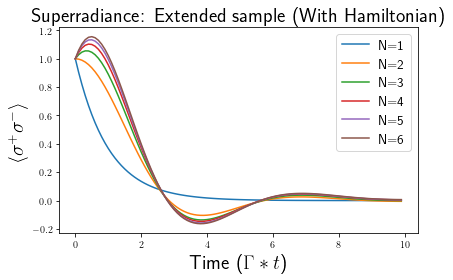

In [15]:
N=7
for i in range(1,N):
    #y0 = to_super(init_state(N))
    y0=init_state(i).full()

    f = lambda y,t: liouville_rk4_ham(i,y)

    t0=0;tf=10
    t=tf-t0
    tlist=np.arange(t0,tf,0.1)

    t,y = RK4(f,y0,t0,tf)
    sp_list,sm_list,spsm_list=initialize(i)
    spsm_exp=sum(sp_list)*sum(sm_list)
    spsm_exp=spsm_exp.full()
    exp=[]
    for n in range(len(y)):
        exp.append(expect(Qobj(y[n]),Qobj(spsm_exp)))
    #y_true = 1*np.exp(t)
    
    plt.xlabel(r'Time ($\Gamma*t$)',fontsize=20)
    plt.ylabel(r'$\langle\sigma^{+}\sigma^{-}\rangle$',fontsize=20)
    
    plt.title(r'Superradiance: Extended sample (With Hamiltonian)',fontsize=20)
    plt.tight_layout()
    #plt.plot(tlist,sexp/i)
    plt.plot(tlist,np.array(exp)/i)
    plt.legend(['N=1','N=2','N=3','N=4','N=5','N=6','N=7'], prop={'size': 13.5})


# Haroche's Equation ($\mu \Gamma=1$)

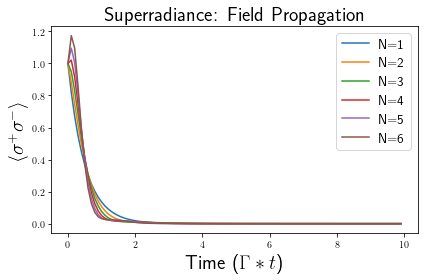

In [11]:
N=7

for i in range(1,N):
    #y0 = to_super(init_state(N))
    y0=init_state(i).full()

    f = lambda y,t: liouville_rk4_haroche_c(i,y)

    t0=0;tf=10
    t=tf-t0
    tlist=np.arange(t0,tf,0.1)

    t,y = RK4(f,y0,t0,tf)
    sp_list,sm_list,spsm_list=initialize(i)
    spsm_exp=sum(sp_list)*sum(sm_list)
    spsm_exp=spsm_exp.full()
    exp=[]
    for n in range(len(y)):
        exp.append(expect(Qobj(y[n]),Qobj(spsm_exp)))
    #y_true = 1*np.exp(t)
    
    plt.xlabel(r'Time ($\Gamma*t$)',fontsize=20)
    plt.ylabel(r'$\langle\sigma^{+}\sigma^{-}\rangle$',fontsize=20)
    
    plt.title(r'Superradiance: Field Propagation',fontsize=20)
    plt.tight_layout()
   # plt.plot(tlist,sexp/i)
    plt.plot(tlist,np.array(exp)/i)
    plt.legend(['N=1','N=2','N=3','N=4','N=5','N=6','N=7'], prop={'size': 13.5})


# Haroches Equation $\Gamma=\gamma_{ij}$

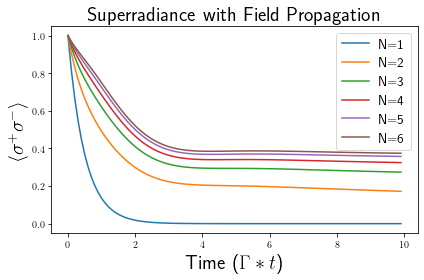

In [13]:
N=7

for i in range(1,N):
    #y0 = to_super(init_state(N))
    y0=init_state(i).full()

    f = lambda y,t: liouville_rk4_haroche(i,y)

    t0=0;tf=10
    t=tf-t0
    tlist=np.arange(t0,tf,0.1)

    t,y = RK4(f,y0,t0,tf)
    sp_list,sm_list,spsm_list=initialize(i)
    spsm_exp=sum(sp_list)*sum(sm_list)
    spsm_exp=spsm_exp.full()
    exp=[]
    for n in range(len(y)):
        exp.append(expect(Qobj(y[n]),Qobj(spsm_exp)))
    #y_true = 1*np.exp(t)
    
    plt.xlabel(r'Time ($\Gamma*t$)',fontsize=20)
    plt.ylabel(r'$\langle\sigma^{+}\sigma^{-}\rangle$',fontsize=20)
    
    plt.title(r'Superradiance with  Field Propagation',fontsize=20)
    plt.tight_layout()
    #plt.plot(tlist,sexp/i)
    plt.plot(tlist,np.array(exp)/i)
    plt.legend(['N=1','N=2','N=3','N=4','N=5','N=6','N=7'], prop={'size': 13.5})


In [ ]:
#For Testing purposes

N=5

#y0 = to_super(init_state(N))
y0=init_state(N).full()

f = lambda y,t: liouville_rk4(N,y)

t0=0.1;tf=4
t=tf-t0
tlist=np.arange(t0,tf,0.1)

t,y = RK4(f,y0,t0,tf)
sp_list,sm_list,spsm_list=initialize(N)
spsm_exp=sum(sp_list)*sum(sm_list)
spsm_exp=spsm_exp.full()
exp=[]
for n in range(len(y)):
    exp.append(expect(Qobj(y[n]),Qobj(spsm_exp)))
#y_true = 1*np.exp(t)
plt.plot(tlist,np.array(exp)/N)